<a href="https://colab.research.google.com/github/Suchitra-V31/Machine-learning-projects/blob/main/Microsoft_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Microsoft Stock Price Prediction**

In this we are going to predict the stock prices of Microsoft using regression techniques.

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/MSFT.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/28/2020,228.179993,230.639999,226.580002,228.910004,226.828613,26292900
1,8/31/2020,227.000000,228.699997,224.309998,225.529999,223.479355,28774200
2,9/1/2020,225.509995,227.449997,224.429993,227.270004,225.203552,25725500
3,9/2/2020,227.970001,232.860001,227.350006,231.649994,229.543701,34080800
4,9/3/2020,229.270004,229.309998,214.960007,217.300003,215.324188,58400300


In [6]:
data.shape

(252, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [7]:
#let us check whether our data has any null values
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There is no nan values present in this data.

Text(0.5, 1.0, 'Microsoft Stock Prices')

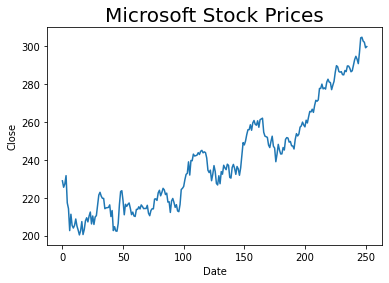

In [15]:
plt.plot(data['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title("Microsoft Stock Prices",fontsize=20)

Let us find if there is any correlation b/w our data.

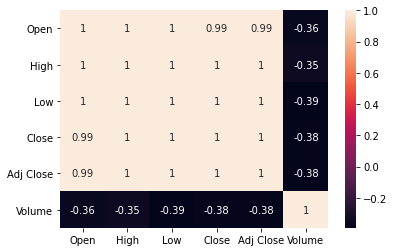

In [10]:
sns.heatmap(data.corr(),annot=True)

We can see that all our data are closely correlated except volume.

Let us split our data into dependent and independent features.

In [16]:
X=data[['Open','Low','High']]
y=data['Close']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

Let us train our model!!!!!

**Using SDG Regressor**

In [19]:
from sklearn.linear_model import SGDRegressor

In [47]:
sdg=SGDRegressor(max_iter=100,eta0=0.1)

In [48]:
model=sdg.fit(X_train,y_train)

In [49]:
pred=model.predict(X_test)

Our model has trained and predicted.... Now let us check the accuracy of our model prediction.

In [50]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [51]:
print('MAE: ',mean_absolute_error(y_test,pred))
print('MSE: ',mean_squared_error(y_test,pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,pred)))


MAE:  119624790715525.05
MSE:  1.447258307239146e+28
RMSE:  120302049327480.12


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Actual vs Predicted')

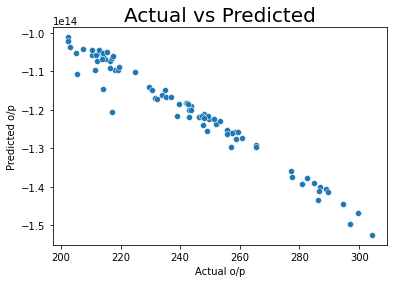

In [52]:
sns.scatterplot(y_test,pred)
plt.xlabel('Actual o/p')
plt.ylabel('Predicted o/p')
plt.title('Actual vs Predicted',fontsize=20)

From this graph we could see that our model has preformed well and has also predicted almost equal to the Close value.

Let us also try this model using SVM...

In [34]:
from sklearn.svm import LinearSVR

In [35]:
svm=LinearSVR(epsilon=1.5)

In [36]:
model_2=svm.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [37]:
pred_2=model_2.predict(X_test)

In [39]:
print('MAE: ',mean_absolute_error(y_test,pred_2))
print('MSE: ',mean_squared_error(y_test,pred_2))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,pred_2)))

MAE:  1.2710136703223522
MSE:  2.391954827597678
RMSE:  1.5465945905755905


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Actual vs Predicted')

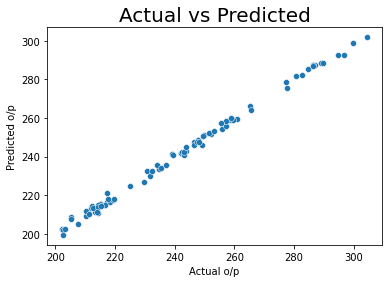

In [40]:
sns.scatterplot(y_test,pred_2)
plt.xlabel('Actual o/p')
plt.ylabel('Predicted o/p')
plt.title('Actual vs Predicted',fontsize=20)

It has also performed well.....



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Prediction-1 vs Prediction-2')

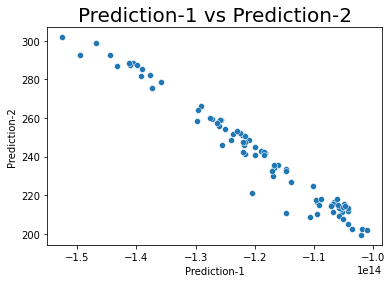

In [65]:
sns.scatterplot(pred,pred_2)
plt.xlabel('Prediction-1')
plt.ylabel('Prediction-2')
plt.title('Prediction-1 vs Prediction-2',fontsize=20,loc='center')

From this we could see the inference of both the models and its prediction.

Using both the techniques our model has predicted well and loss has minimized to the maximum.